### 다항 회귀 분석

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('hour_score_nonlinear.csv')
dataset

,Hours,Score
0,2.2,20
1,4.5,62
2,1.6,15
3,3.6,50
4,10.0,100
5,9.3,95
6,6.4,85
7,5.7,70
8,5.5,68
9,7.2,88


In [9]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X

array([[ 2.2],
       [ 4.5],
       [ 1.6],
       [ 3.6],
       [10. ],
       [ 9.3],
       [ 6.4],
       [ 5.7],
       [ 5.5],
       [ 7.2],
       [ 7.4],
       [ 8.3],
       [ 2.6],
       [ 8.7],
       [ 9.1],
       [ 1.2],
       [ 3.1],
       [ 4.8],
       [ 6.9],
       [10.2]])

### 단순 선형 회귀

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

### 데이터 시각화

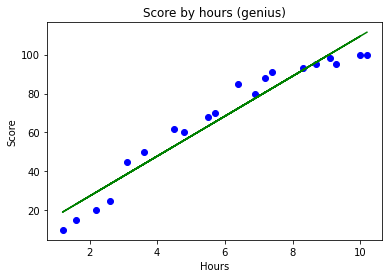

In [6]:
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='green')
plt.title('Score by hours (genius)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [7]:
reg.score(X, y)

0.9379694814942281

### 다항 회귀

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)   # 2차 다항식
X_poly = poly_reg.fit_transform(X) # X가 3이라면 [1 3 9]로 변환
X_poly[:5], X[:5]

(array([[  1.  ,   2.2 ,   4.84],
        [  1.  ,   4.5 ,  20.25],
        [  1.  ,   1.6 ,   2.56],
        [  1.  ,   3.6 ,  12.96],
        [  1.  ,  10.  , 100.  ]]),
 array([[ 2.2],
        [ 4.5],
        [ 1.6],
        [ 3.6],
        [10. ]]))

In [76]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

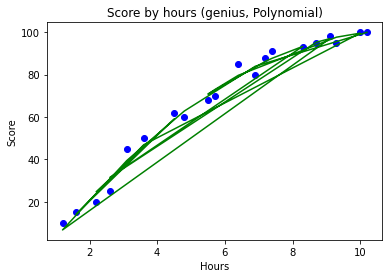

In [78]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X_poly), color='green')
plt.title('Score by hours (genius, Polynomial)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [79]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

array([ 1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1])

In [80]:
X_range.shape

(90,)

In [81]:
X_range = X_range.reshape(-1, 1)
X_range.shape

(90, 1)

In [82]:
X_range[:5]

array([[1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6]])

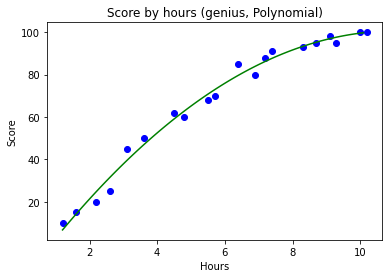

In [83]:
plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('Score by hours (genius, Polynomial)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### 예측

In [84]:
reg.predict([[2]]) # 2시간 공부했을 때 성적 (선형회귀)

array([27.34370071])

In [85]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간 공부했을 때 성적 (다항회귀)

array([21.39872605])

In [86]:
reg.score(X, y)

0.9379694814942281

In [87]:
lin_reg.score(X_poly, y)

0.9877647919398794